In [1]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/python/3.7.13/bin/python3.7 -m pip install --upgrade pip' command.


# Will this affect the ~~Trout~~ **Abalone** Population?

![Trout Image](troutpng.png)

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [3]:
from ucimlrepo import fetch_ucirepo   

# fetch dataset 
abalone = fetch_ucirepo(id=1) 

# data (as pandas dataframes) 
i_love_abalone = abalone.data.features 
abalone_rings = abalone.data.targets 

# variable information 
print(abalone.variables) 

             name     role         type demographic  \
0             Sex  Feature  Categorical        None   
1          Length  Feature   Continuous        None   
2        Diameter  Feature   Continuous        None   
3          Height  Feature   Continuous        None   
4    Whole_weight  Feature   Continuous        None   
5  Shucked_weight  Feature   Continuous        None   
6  Viscera_weight  Feature   Continuous        None   
7    Shell_weight  Feature   Continuous        None   
8           Rings   Target      Integer        None   

                   description  units missing_values  
0         M, F, and I (infant)   None             no  
1    Longest shell measurement     mm             no  
2      perpendicular to length     mm             no  
3           with meat in shell     mm             no  
4                whole abalone  grams             no  
5               weight of meat  grams             no  
6  gut weight (after bleeding)  grams             no  
7        

## Exploring our data

In [4]:
# Abalone data metrics
i_love_abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [5]:
# Abalone ring metrics
abalone_rings.head() 

,Rings
0,15
1,7
2,9
3,10
4,7


In [6]:
# Any missing data in our abalone data data?
i_love_abalone.isnull().sum() # no! :) 

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
dtype: int64

In [7]:
# Any missing data in our abalone ring data?
abalone_rings.isnull().sum() # no! :)

Rings    0
dtype: int64

Our data consists of 2 different dataframes of equal sizes. The authors of this set decided to split the `rings` data from the rest of the metrics. We will be joining them together.

### Joining data together

Concatenating them instead of using merge since they don't share any common index but the datasets are of the same lengths.

In [8]:
i_love_abalone_deluxe = pd.concat([abalone_rings, i_love_abalone], axis = 1) # concat via columns
i_love_abalone_deluxe.head()

,Rings,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,15,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,7,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,9,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,10,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,7,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


### Sorting by rings

In [9]:
i_love_abalone_deluxe_sorted = i_love_abalone_deluxe.sort_values(by = 'Rings', ascending = False).copy()
i_love_abalone_deluxe_sorted.head()

,Rings,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
480,29,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475
2209,27,F,0.550,0.465,0.180,1.2125,0.3245,0.2050,0.525
2108,27,M,0.665,0.535,0.225,2.1835,0.7535,0.3910,0.885
294,26,M,0.600,0.495,0.195,1.0575,0.3840,0.1900,0.375
2201,25,F,0.645,0.490,0.215,1.4060,0.4265,0.2285,0.510


### Filter out insufficient ring data at the end higher ring counts

In [10]:
i_love_abalone_deluxe_sorted_filtered = i_love_abalone_deluxe_sorted[i_love_abalone_deluxe_sorted['Rings'] < 24].copy()
i_love_abalone_deluxe_sorted_filtered.head()

,Rings,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
314,23,M,0.63,0.485,0.175,1.3000,0.4335,0.2945,0.460
313,23,F,0.62,0.470,0.200,1.2255,0.3810,0.2700,0.435
2305,23,F,0.55,0.415,0.135,0.7750,0.3020,0.1790,0.260
501,23,F,0.62,0.520,0.225,1.1835,0.3780,0.2700,0.395
2334,23,F,0.80,0.630,0.195,2.5260,0.9330,0.5900,0.620


## What about abalone do we care about?
Lets predict age from physical measurements!

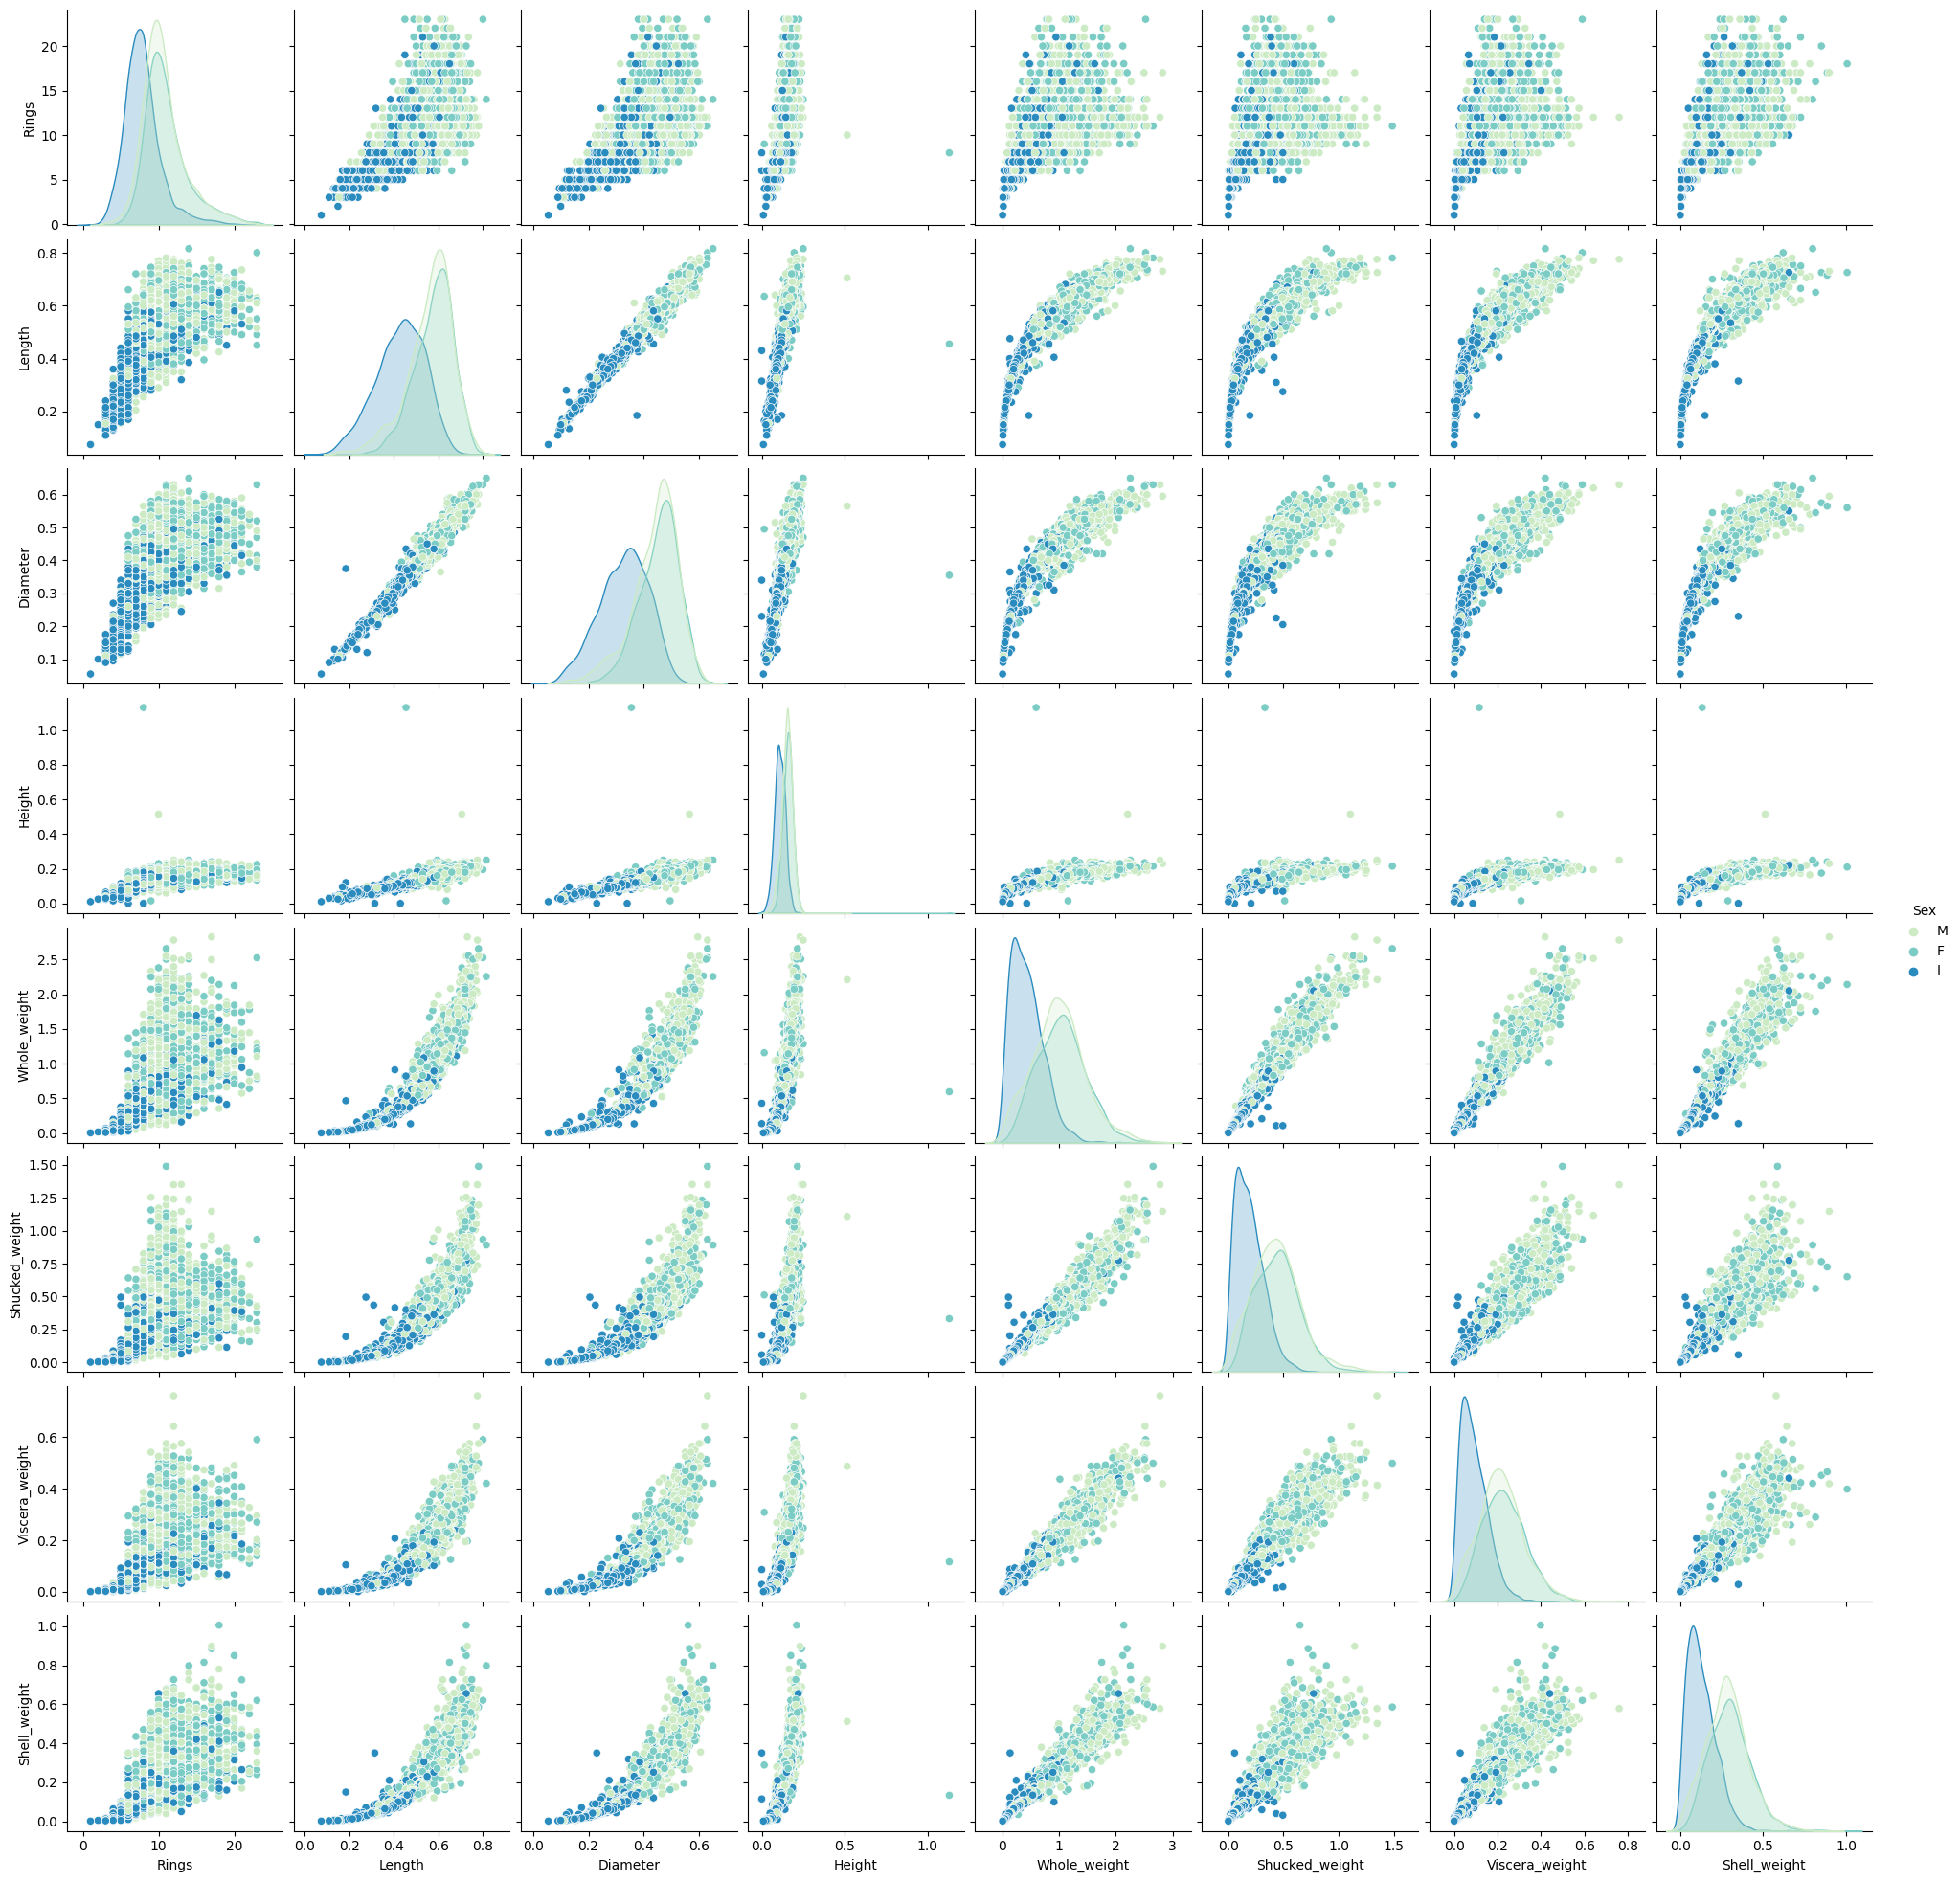

In [11]:
sns.pairplot(i_love_abalone_deluxe_sorted_filtered, hue = 'Sex', palette = 'GnBu')
plt.show()

### Abalone average weight by ring size faceted by sex

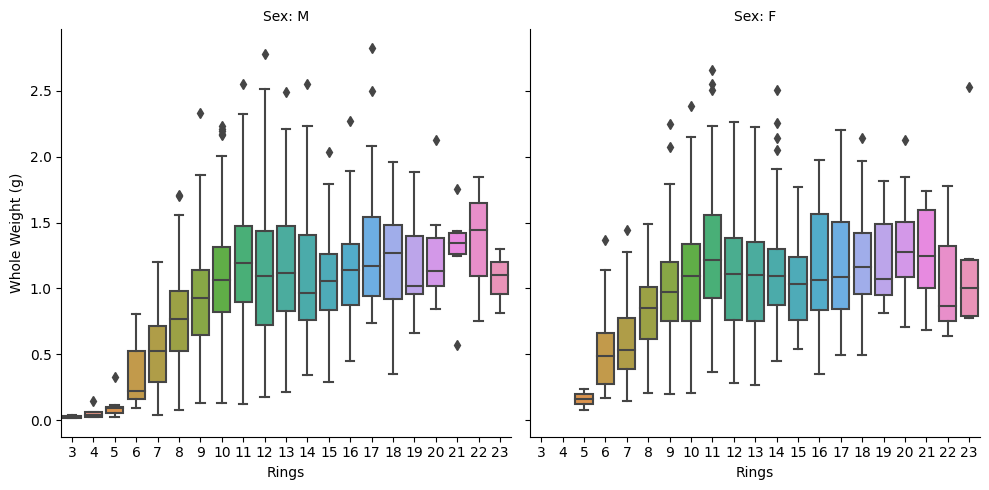

In [12]:
abalone_adults = i_love_abalone_deluxe_sorted_filtered[i_love_abalone_deluxe_sorted_filtered['Sex'] != 'I'].copy()

# Faceted box plot by Sex without infants.
my_catplot = sns.catplot(x = 'Rings', y = 'Whole_weight', kind = 'box', col = 'Sex', data = abalone_adults)
my_catplot.set_axis_labels('Rings', 'Whole Weight (g)')
my_catplot.set_titles("Sex: {col_name}")

# Show the plot
plt.show()

#### What is the distribution of abalone based on ring size by sex?

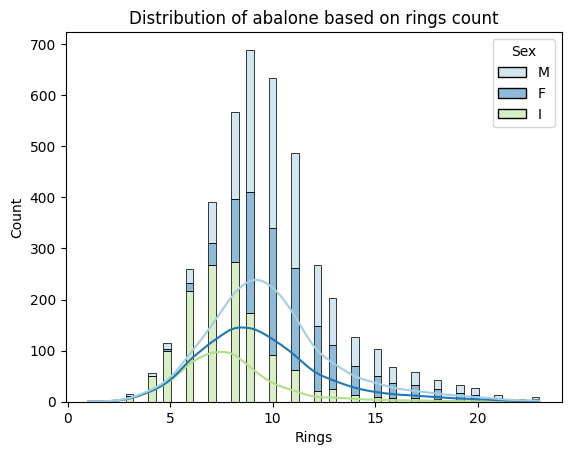

In [13]:
fig = plt.figure()
sns.histplot(data = i_love_abalone_deluxe_sorted_filtered, x = 'Rings', kde = True, hue = 'Sex', multiple = 'stack', palette = 'Paired')
plt.title('Distribution of abalone based on rings count')
plt.show()

#### Distribution of abalone based on ring excluding infants

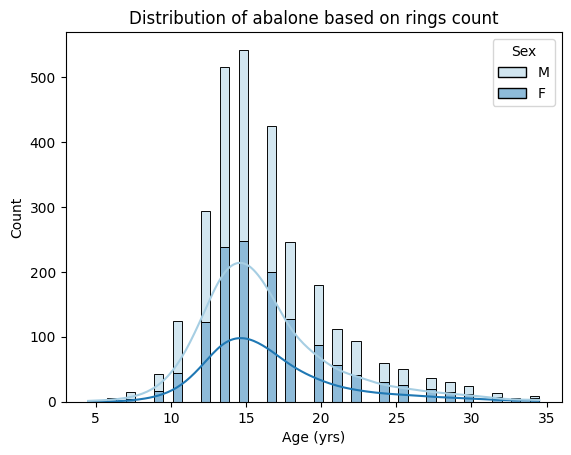

In [14]:
# Only want the adults of our dataset
abalone_adults = i_love_abalone_deluxe_sorted_filtered[i_love_abalone_deluxe_sorted_filtered['Sex'] != 'I'].copy()

# Convert Abalone Ring sizes to Age (=Rings * 1.5)
abalone_adults['Age'] = abalone_adults['Rings'] * 1.5

fig = plt.figure()
sns.histplot(data = abalone_adults, x = 'Age', kde = True, hue = 'Sex', multiple = 'stack', palette = 'Paired')
plt.title('Distribution of abalone based on rings count')
plt.xlabel('Age (yrs)')
plt.show()

### What is the correlation of our abalone measurements?

In [15]:
corr_abalone = (i_love_abalone_deluxe_sorted_filtered
                 .select_dtypes(include=['float64', 'int64'])
                 .corr())

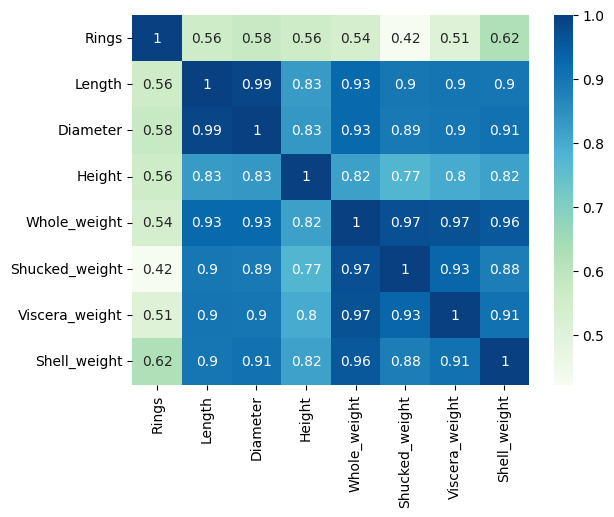

In [16]:
sns.heatmap(corr_abalone, 
            annot=True, 
            cmap="GnBu")
plt.show()

#### Does weight increase as rings increase?

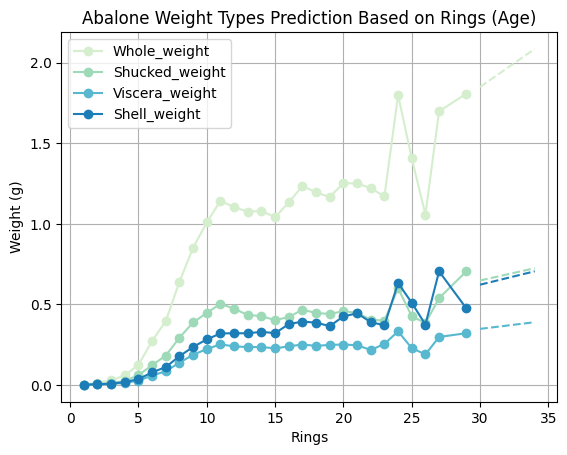

In [17]:
from sklearn.linear_model import LinearRegression

# Compute the means of each weight type
abalone_means = i_love_abalone_deluxe_sorted.groupby('Rings').mean()

# List of columns to predict
columns_to_predict = ['Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

# List to hold the labels and handles for the legend
legend_labels = []
legend_handles = []

# Seaborn color pallete for consistency
colors = sns.color_palette('GnBu', len(columns_to_predict))
colors_index = 0

plt.figure()
# Loop through each weight type and plot the original data and predictions
for col in columns_to_predict:
    X = abalone_means.index.values.reshape(-1, 1)  # using 'Rings' as the time axis
    y = abalone_means[col].values  # The weight columns as our target

    # Create & predict model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X) # Make predictions for data
    max_ring = abalone_means.index.max()  # Get max ring value from the filtered data
    future_rings = np.array([max_ring + 1, max_ring + 5]).reshape(-1, 1)
    future_predictions = model.predict(future_rings)

    # Original Data
    original_line = plt.plot(abalone_means.index, y, marker='o', color = colors[colors_index])[0]
    
    # This is for our legend labels
    legend_handles.append(original_line)
    legend_labels.append(col)

    # Predicting our future ring weights.
    plt.plot(future_rings, future_predictions, linestyle = 'dashed', color = colors[colors_index])
    
    colors_index += 1 # Incrementing colors index.
    
plt.title('Abalone Weight Types Prediction Based on Rings (Age)')
plt.xlabel('Rings')
plt.ylabel('Weight (g)')
plt.grid(True)
plt.legend(handles = legend_handles, labels = legend_labels)
plt.show()